# Part I - Ford Gobike Data Exploration
## by (Joshua Dei-Alorse)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#Uni">Univariate Exploration</a></li>
<li><a href="#Bi">Bivariate Exploration</a></li>
<li><a href="#Multi">Multivariate Exploration</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>


<a id='intro'></a>
## Introduction
* **Ford GoBike System Data:** 
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

<a id='wrangling'></a>
## Preliminary Wrangling

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta

%matplotlib inline 

In [2]:
# read data_set and make copy to save it 
bike_df = pd.read_csv("../Downloads/201902-fordgobike-tripdata.csv")
bike_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14642,959,2019-02-27 11:33:23.6400,2019-02-27 11:49:23.2110,126.0,Esprit Park,37.761634,-122.390648,22.0,Howard St at Beale St,37.789756,-122.394643,3319,Subscriber,1959.0,Male,No
14643,615,2019-02-27 11:38:49.3620,2019-02-27 11:49:05.2800,61.0,Howard St at 8th St,37.776513,-122.411306,14.0,Clay St at Battery St,37.795001,-122.399970,4722,Subscriber,1967.0,Male,No
14644,807,2019-02-27 11:35:35.7340,2019-02-27 11:49:03.0580,369.0,Hyde St at Post St,37.787349,-122.416651,25.0,Howard St at 2nd St,37.787522,-122.397405,1884,Customer,1990.0,Male,No
14645,392,2019-02-27 11:42:25.9540,2019-02-27 11:48:58.6940,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,5983,Subscriber,1992.0,Male,No


In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14647 entries, 0 to 14646
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             14647 non-null  int64  
 1   start_time               14647 non-null  object 
 2   end_time                 14647 non-null  object 
 3   start_station_id         14633 non-null  float64
 4   start_station_name       14633 non-null  object 
 5   start_station_latitude   14647 non-null  float64
 6   start_station_longitude  14647 non-null  float64
 7   end_station_id           14633 non-null  float64
 8   end_station_name         14633 non-null  object 
 9   end_station_latitude     14647 non-null  float64
 10  end_station_longitude    14647 non-null  float64
 11  bike_id                  14647 non-null  int64  
 12  user_type                14647 non-null  object 
 13  member_birth_year        14105 non-null  float64
 14  member_gender         

In [4]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,14647.000000,14633.000000,14647.000000,14647.000000,14633.000000,14647.000000,14647.000000,14647.000000,14105.000000
mean,729.612139,133.252443,37.771392,-122.355035,133.926194,37.771100,-122.355273,4915.483649,1984.663807
std,1983.324156,111.694952,0.097864,0.115125,111.566402,0.097809,0.115167,1566.548137,9.932835
min,62.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1900.000000
25%,327.000000,43.000000,37.771058,-122.411726,43.000000,37.770407,-122.411738,4602.000000,1980.000000
50%,515.000000,93.000000,37.780955,-122.398285,96.000000,37.780526,-122.398285,5324.000000,1987.000000
75%,794.000000,230.000000,37.795392,-122.294837,227.000000,37.795392,-122.294837,6020.000000,1992.000000
max,83195.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6644.000000,2000.000000


### Cleaning

In [5]:
#making a copy
df = bike_df.copy()

In [6]:
# Drop missing values
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [8]:
# Changing data type .
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_station_id'] =  df['start_station_id'].astype(str)
df['end_station_id'] =  df['end_station_id'].astype(str)
df['bike_id'] =  df['bike_id'].astype(str)
df['member_gender'] =  df['member_gender'].astype('category')
df['user_type'] =  df['user_type'].astype('category')
df['bike_share_for_all_trip'] =  df['bike_share_for_all_trip'].astype('category')
df['member_birth_year'] =  df['member_birth_year'].astype(int)

In [9]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip          category
dtype: object

In [10]:
# Duration in seconds to duration in minutes
df['duration_min'] = df['duration_sec']/60

In [11]:
#Start date
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_date'] = pd.to_datetime(df['start_date'])

In [12]:
# Start time hour
df['start_hour'] = df.start_time.dt.strftime('%H')

In [13]:
# Start time weekday
df['start_weekday'] = df['start_time'].dt.strftime('%A')

In [14]:
# Start time month (January - December)
df['start_month'] = df['start_time'].dt.strftime('%B')

In [15]:
# member age
df['member_age'] = 2019 - df.member_birth_year
df['member_age'] = df['member_age'].astype(int)

In [16]:
# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
        
        a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
    return earth_radius * 2 * np.arcsin(np.sqrt(a))


# Kilometers covered 
df['dist'] = \
haversine(df.start_station_latitude, df.start_station_longitude,
             df.end_station_latitude, df.end_station_longitude)

In [17]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_date,start_hour,start_weekday,start_month,member_age,dist
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984,Male,No,869.750000,2019-02-28,17,Thursday,February,35,0.544709
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,1030.900000,2019-02-28,12,Thursday,February,47,2.704545
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989,Other,No,608.166667,2019-02-28,17,Thursday,February,30,0.260739
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,26.416667,2019-02-28,23,Thursday,February,45,2.409301
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959,Male,No,29.883333,2019-02-28,23,Thursday,February,60,3.332203


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14090 entries, 0 to 14645
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             14090 non-null  int64         
 1   start_time               14090 non-null  datetime64[ns]
 2   end_time                 14090 non-null  datetime64[ns]
 3   start_station_id         14090 non-null  object        
 4   start_station_name       14090 non-null  object        
 5   start_station_latitude   14090 non-null  float64       
 6   start_station_longitude  14090 non-null  float64       
 7   end_station_id           14090 non-null  object        
 8   end_station_name         14090 non-null  object        
 9   end_station_latitude     14090 non-null  float64       
 10  end_station_longitude    14090 non-null  float64       
 11  bike_id                  14090 non-null  object        
 12  user_type                14090 n

In [19]:
#Removing unwanted columns
df = df.drop(['start_time','end_time','start_station_id','start_station_latitude','start_station_longitude',
              'end_station_id','end_station_latitude','end_station_longitude','member_birth_year'], axis=1)

In [20]:
df.sample(10)

,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,start_date,start_hour,start_weekday,start_month,member_age,dist
11349,494,Potrero Ave and Mariposa St,16th St Mission BART Station 2,2225,Subscriber,Male,No,8.233333,2019-02-27,18,Wednesday,February,31,1.129704
2679,694,Shattuck Ave at Hearst Ave,Fifth St at Delaware St,5885,Subscriber,Male,No,11.566667,2019-02-28,17,Thursday,February,31,2.761633
9292,188,29th St at Tiffany Ave,24th St at Bartlett St,6633,Subscriber,Male,No,3.133333,2019-02-28,07,Thursday,February,56,0.906943
10066,892,The Embarcadero at Sansome St,Market St at 10th St,4902,Subscriber,Female,No,14.866667,2019-02-27,21,Wednesday,February,27,3.368189
12265,434,Steuart St at Market St,Commercial St at Montgomery St,4902,Subscriber,Male,No,7.233333,2019-02-27,17,Wednesday,February,33,0.746349
12650,412,Powell St BART Station (Market St at 4th St),Beale St at Harrison St,4608,Subscriber,Male,No,6.866667,2019-02-27,17,Wednesday,February,27,1.161070
5026,219,Telegraph Ave at Carleton St,Bancroft Way at Telegraph Ave,5639,Subscriber,Male,No,3.650000,2019-02-28,14,Thursday,February,25,0.721963
6495,847,Market St at 10th St,Steuart St at Market St,1931,Customer,Female,No,14.116667,2019-02-28,10,Thursday,February,36,2.803684
4933,1600,Fifth St at Delaware St,Emeryville Public Market,5116,Subscriber,Male,No,26.666667,2019-02-28,14,Thursday,February,58,3.366711
11675,341,Victoria Manalo Draves Park,San Francisco Caltrain Station 2 (Townsend St...,4639,Subscriber,Male,No,5.683333,2019-02-27,18,Wednesday,February,33,0.966986


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14090 entries, 0 to 14645
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             14090 non-null  int64         
 1   start_station_name       14090 non-null  object        
 2   end_station_name         14090 non-null  object        
 3   bike_id                  14090 non-null  object        
 4   user_type                14090 non-null  category      
 5   member_gender            14090 non-null  category      
 6   bike_share_for_all_trip  14090 non-null  category      
 7   duration_min             14090 non-null  float64       
 8   start_date               14090 non-null  datetime64[ns]
 9   start_hour               14090 non-null  object        
 10  start_weekday            14090 non-null  object        
 11  start_month              14090 non-null  object        
 12  member_age               14090 n

In [22]:
df.columns.values.tolist() 

['duration_sec',
 'start_station_name',
 'end_station_name',
 'bike_id',
 'user_type',
 'member_gender',
 'bike_share_for_all_trip',
 'duration_min',
 'start_date',
 'start_hour',
 'start_weekday',
 'start_month',
 'member_age',
 'dist']

In [23]:
df.describe()

,duration_sec,duration_min,member_age,dist
count,14090.000000,14090.000000,14090.000000,14090.000000
mean,719.963023,11.999384,34.338964,1.722880
std,1927.710982,32.128516,9.935998,1.098575
min,62.000000,1.033333,19.000000,0.000000
25%,326.000000,5.433333,27.000000,0.932671
50%,513.000000,8.550000,32.000000,1.460586
75%,790.000000,13.166667,39.000000,2.287193
max,83195.000000,1386.583333,119.000000,9.003878


In [24]:
print('Duration Hour', (1386/60))

Duration Hour 23.1


* _Riding for about 23 hours seems very unusual_
* _Riding at age 119 also seems very unsusual_

In [25]:
len(df[df['duration_min'] > 65])

86

In [26]:
df[df['duration_min'] > 65].sample(30)

,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,start_date,start_hour,start_weekday,start_month,member_age,dist
5701,4065,Lombard St at Columbus Ave,Broadway at Kearny,5353,Customer,Male,No,67.750000,2019-02-28,11,Thursday,February,25,0.852123
790,5927,Powell St BART Station (Market St at 5th St),Esprit Park,6438,Subscriber,Female,No,98.783333,2019-02-28,18,Thursday,February,25,2.928532
2,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,1030.900000,2019-02-28,12,Thursday,February,47,2.704545
9135,6842,Pierce St at Haight St,Hubbell St at 16th St,5523,Subscriber,Male,No,114.033333,2019-02-28,05,Thursday,February,24,3.169593
4658,9185,Folsom St at 15th St,11th St at Bryant St,5769,Customer,Male,No,153.083333,2019-02-28,12,Thursday,February,41,0.466317
14337,4743,El Embarcadero at Grand Ave,Grand Ave at Perkins St,4623,Subscriber,Male,No,79.050000,2019-02-27,11,Wednesday,February,30,0.595675
5446,17151,20th St at Bryant St,Webster St at Grove St,5010,Subscriber,Female,No,285.850000,2019-02-28,08,Thursday,February,38,2.634632
3401,62452,Doyle St at 59th St,32nd St at Adeline St,4683,Subscriber,Female,No,1040.866667,2019-02-28,00,Thursday,February,30,2.098161
5415,4188,Scott St at Golden Gate Ave,Golden Gate Ave at Polk St,6329,Subscriber,Male,Yes,69.800000,2019-02-28,12,Thursday,February,36,1.612433
945,16768,Powell St BART Station (Market St at 5th St),Central Ave at Fell St,2464,Customer,Male,No,279.466667,2019-02-28,15,Thursday,February,45,3.363349


In [27]:
len(df[df['member_age'] > 70])

30

In [28]:
# Droping unusual value to prevent outliers
df.drop(df.index[df['member_age'] > 70], inplace=True)
df.drop(df.index[df['duration_min'] > 65], inplace=True)

In [29]:
print(len(df[df['duration_min'] > 65]))
print(len(df[df['member_age'] > 70]))

0
0


In [30]:
df.shape

(13974, 14)

In [31]:
# Storing cleaned data for future use
df.to_csv("fordgobike-tripdata_cleaned.csv", index=False)

### Structure of your dataset?

> The dataset originally contains 14647 Ford GoBike rides with 16 characteristics (duration_sec, start_time, end_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip).

>After Prelimary wrangling this dataset now contains 13974 Ford GoBike rides with 14 charateristics for each individual rides ('duration_sec', 'start_station_name', 'end_station_name', 'bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip', 'duration_min', 'start_date', 'start_hour', 'start_weekday', 'start_month', 'end_month', 'member_age', 'dist')


### Main feature(s) of interest in dataset?

> I'm particularly interested in determining how other dataset characteristics such as age, user type, and gender effect the trip duration and distance traveled.

### Features in the dataset that will help support investigation of interest?

> start_station_name, user_type, member_gender, start_date, start_hour, start_weekday, member_age, duration_min and distance


<a id='Uni'></a>
## Univariate Exploration

In this section, I investigate the distributions of individual variables of interest. 

In [32]:
# setting color pattern 
c = sb.color_palette()[0]

### What were the most popular Start Station?

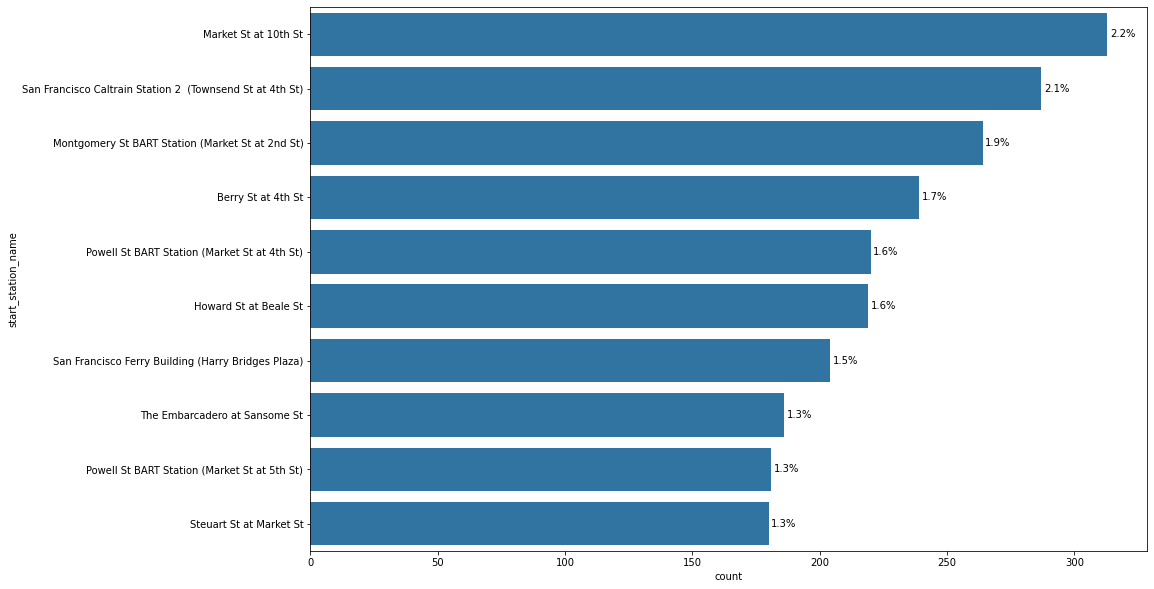

In [33]:
s_station = df.start_station_name.value_counts().head(10)
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
o = s_station.index
sb.countplot(data=df , y='start_station_name' , color=c , order=o);

# Putting percentage  
for i in range(s_station.shape[0]):
    count = s_station[i]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
    plt.text(count+1, i, pct_string, va = 'center');

**Observation**
>The most popular start stations were `Market St at 10th St` and `San Francisco Caltrain Station 2 (Townsend St at 4th St) `.

### What is the distribution of user type ?

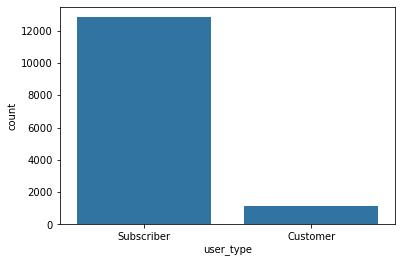

In [34]:
# Gender data 
o = df.user_type.value_counts().index
User =df.user_type.value_counts()
sb.countplot(data=df , x='user_type' , color= c , order=o);

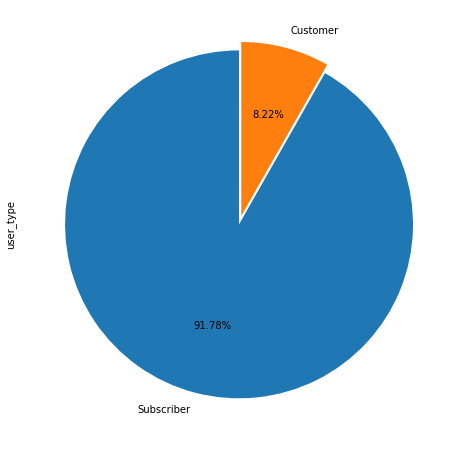

In [35]:
User.plot.pie(figsize=(8,8),autopct='%.2f%%', startangle=90, explode=(0,.05));

**Observation**
> Most of the users of this system were subscribers making up 91.78% of the users

### What is the distribution of member's gender ?

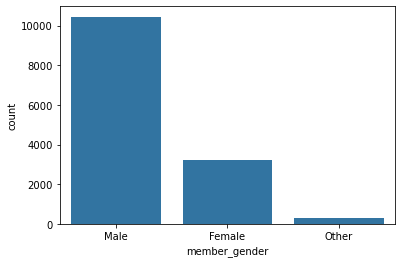

In [36]:
# Gender data 
Gender = df.member_gender.value_counts()
o = Gender.index
sb.countplot(data=df , x='member_gender' , color= c , order=o);

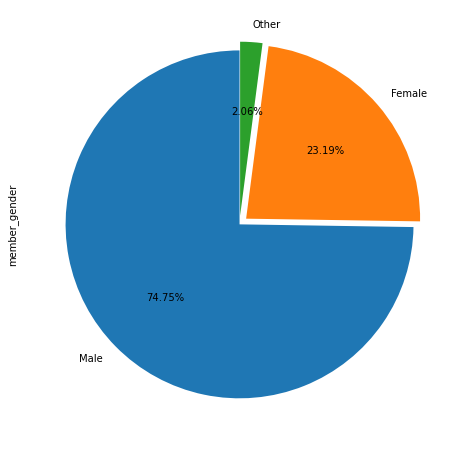

In [37]:
Gender.plot.pie(figsize=(8,8),autopct='%.2f%%', startangle=90, explode=(0,.05,.05));

**Observation**
> Most of the users of this system were males, making up 74.75% of the users

### How often were the bike shared ?

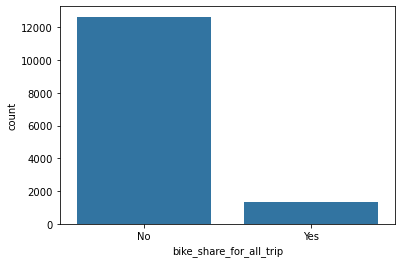

In [38]:
sb.countplot(data=df , x='bike_share_for_all_trip' , color= c);

**Observation**
> The bike wasn't shared most of the time

### What is the distribution for duration of the rides (in minutes)?

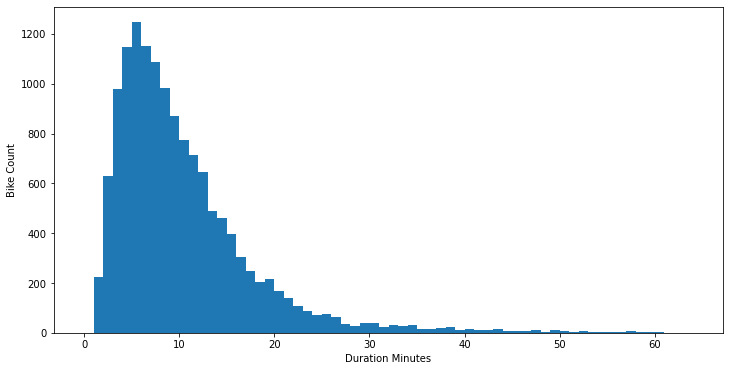

In [39]:
bin_edges = np.arange(0,65,1)
plt.figure(figsize=(12,6))
plt.hist(data = df, x = 'duration_min', bins = bin_edges);
plt.xlabel('Duration Minutes')
plt.ylabel('Bike Count');

**Observation**
> Distribution for duration minutes is rightly skewed. With most rider lasting for about 5mins

### What is the distribution rides across the hours of the day?

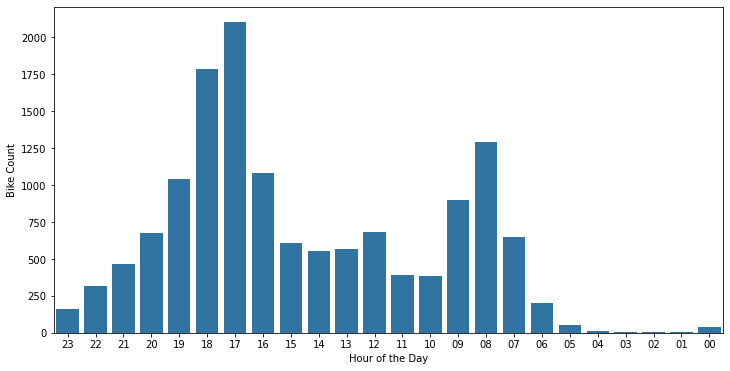

In [40]:
plt.figure(figsize=(12,6))
sb.countplot(data=df , x='start_hour' , color= c );
plt.xlabel('Hour of the Day')
plt.ylabel('Bike Count');

**Observation**
> The most usage during the morning was around the hours of 8-9am, and in the afternoon was around the hours of 5-6pm.
>Generally it seems most rides started around 5pm

### Which days of the week had most rides?

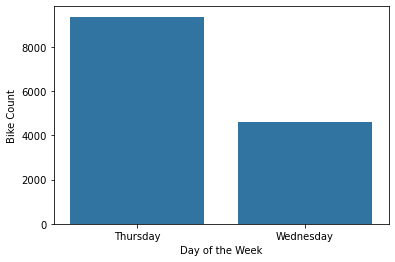

In [41]:
o = df.start_weekday.value_counts().index
sb.countplot(data=df , x='start_weekday' , color= c , order=o);
plt.xlabel('Day of the Week')
plt.ylabel('Bike Count');

In [42]:
df.start_weekday.value_counts()

Thursday     9367
Wednesday    4607
Name: start_weekday, dtype: int64

**Observation**
>  Interestly, riders went for rides only on Thursdays and Wednesdays
Among this two days Thursdays hadd the most rides

### What is the distribution across months?

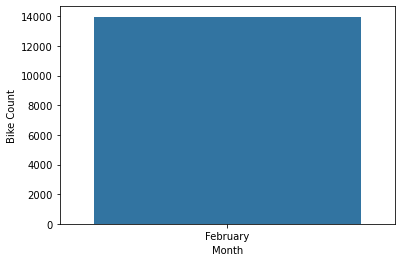

In [43]:
sb.countplot(data=df , x='start_month' , color= c );
plt.xlabel('Month')
plt.ylabel('Bike Count');

In [44]:
len(df[df['start_month'] != 'February'])

0

**Observation**
> All rides started in February

### What is the distribution across different ages?

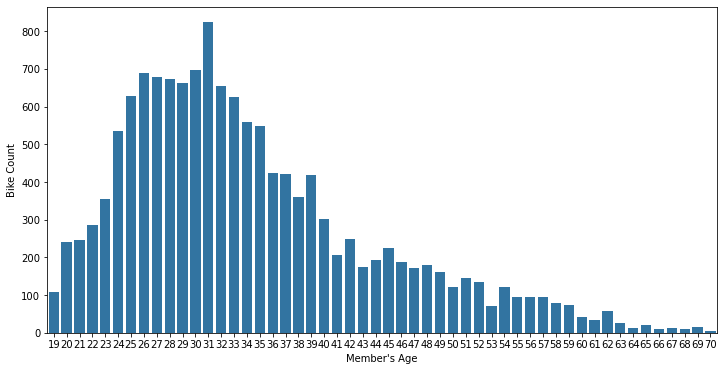

In [45]:
plt.figure(figsize=(12,6))
sb.countplot(data = df, x = 'member_age', color = c);
plt.xlabel("Member's Age")
plt.ylabel('Bike Count');

**Observation**
> The age with the most riders is age 31

### What is the distribution for Distanced Traveled?

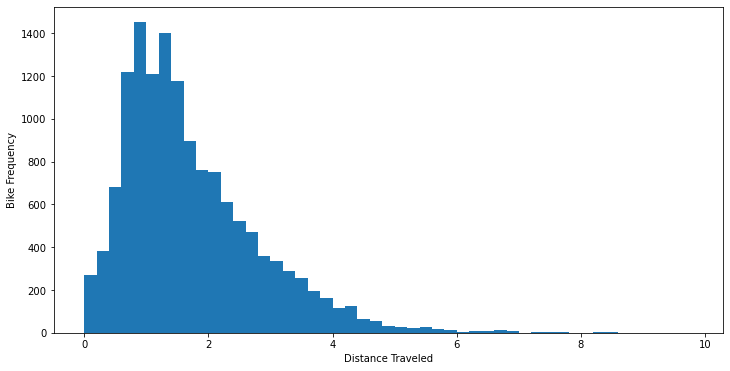

In [46]:
bin_edges = np.arange(0,10,.2)
plt.figure(figsize=(12,6))
plt.hist(data = df, x = 'dist', bins = bin_edges);
plt.xlabel("Distance Traveled")
plt.ylabel('Bike Frequency');

**Observation**
> Distribution for distance traveled is rightly skewed. It also seems that the distance that was traveled the most is around 1km

### General observations from Univariante Visualisations

> Thanks to the cleaning process done earlier, discovering the parameter distributions was relatively easy with none of the distributions unsually standing out.

<a id='Bi'></a>
## Bivariate Exploration

> In this section,I will investigate relationships between pairs of variables in the data.

### What is the relationship between User Type and Member's Gender?

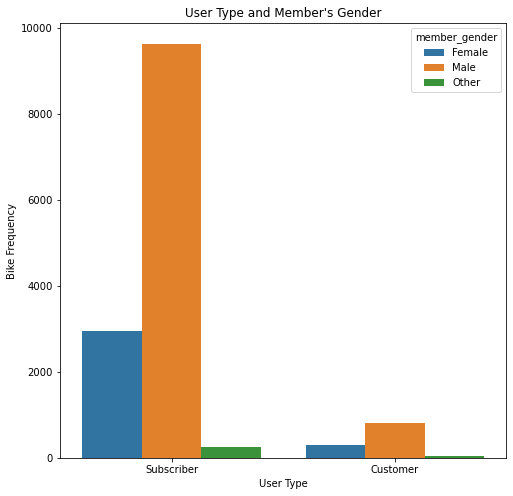

In [47]:
sb.countplot(data=df, x="user_type",  hue="member_gender", order=df.user_type.value_counts().index)
plt.gcf().set_size_inches(8,8)
plt.title("User Type and Member's Gender");
plt.xlabel("User Type")
plt.ylabel('Bike Frequency');

**Observation**
> Even across genders subscribers seem to be more than customers.
It can also observed that a very large amount of riders are male susbribers.

### What is the relationship between User Type and Start Hour?

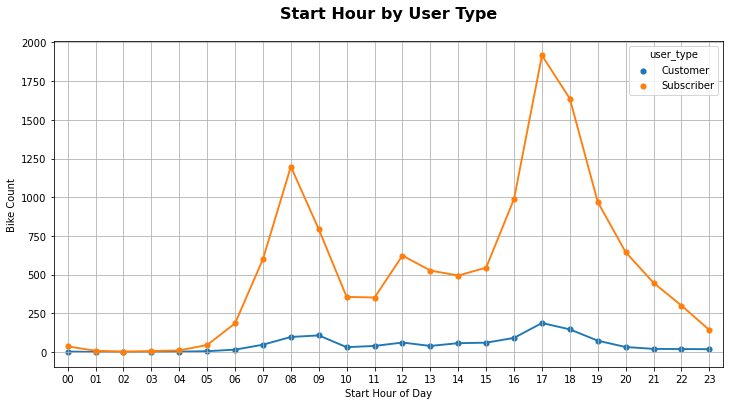

In [48]:
plt.figure(figsize = [12, 6]);
user_hour = df.groupby(['start_hour', 'user_type']).size().reset_index()
sb.pointplot(data=user_hour, x= 'start_hour',y= 0, hue = 'user_type', scale=.7);
plt.title('Start Hour by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Start Hour of Day')
plt.ylabel('Bike Count');
plt.grid()

**Observation**
> Both Subscribers and Customers had most usuage around 5pm

### What is the relationship between User Type and Member's Age?

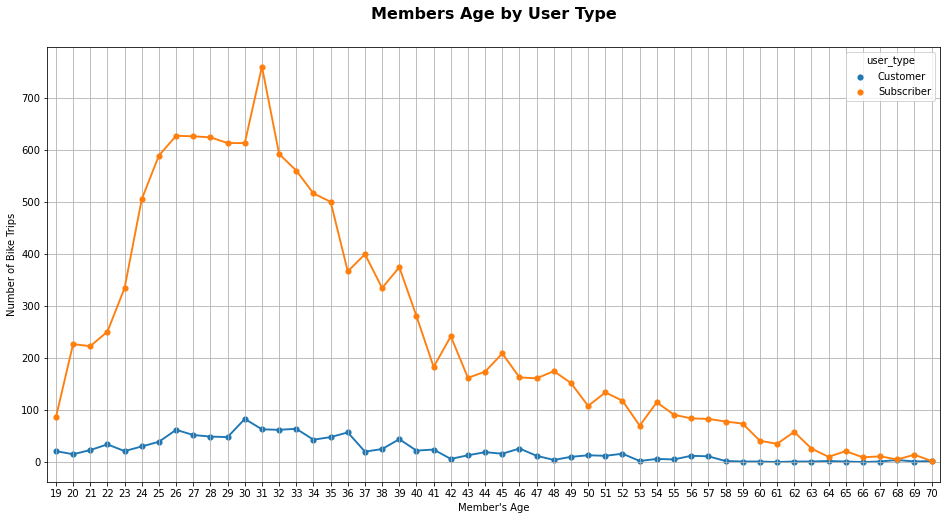

In [49]:
plt.figure(figsize = [16, 8]);
user_hour = df.groupby(['member_age', 'user_type']).size().reset_index()
sb.pointplot(data=user_hour, x= 'member_age',y= 0, hue = 'user_type', scale=.7);
plt.title('Members Age by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel("Member's Age")
plt.ylabel('Number of Bike Trips');
plt.grid()

**Observation**
> Among customers, those of the age 30 had the most number  while for subsribers the age with the highest number is 31.

> Interestly it seems for both User Types, most member were less than 40.

## _Trip Duration_

### What is the relationship between User Type and Ride Duration?

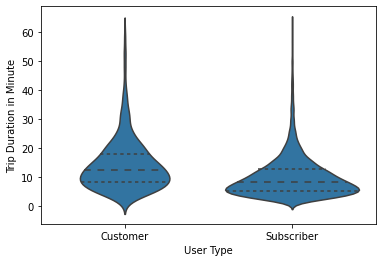

In [50]:
sb.violinplot(data=df, x='user_type', y='duration_min', color = c, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

<Figure size 864x720 with 0 Axes>

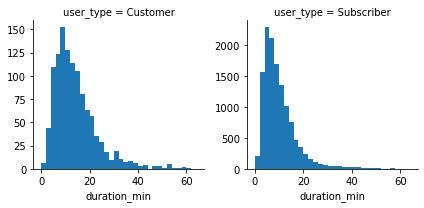

In [51]:
bin_edges = np.arange(0, 65,2)
plt.figure(figsize = [12,10])
g = sb.FacetGrid(data = df, col = 'user_type', sharey= False );
g.map(plt.hist, 'duration_min', bins = bin_edges );

**Observation**
>It seems subscribers tend to have shorter trips compared to customers

### What is the relationship between Week Day and Ride Duration?

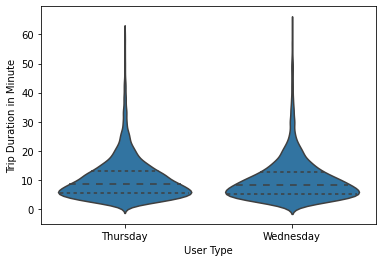

In [52]:
sb.violinplot(data=df, x='start_weekday', y='duration_min', color = c, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

**Observation**
>It seems the duration of the rides on both days seem very similar

### What is the relationship between Member's Gender and Ride Duration?

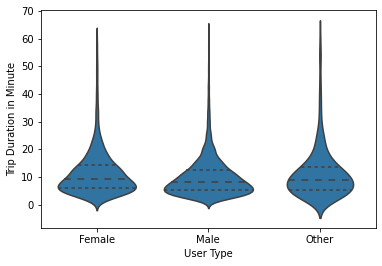

In [53]:
sb.violinplot(data=df, x='member_gender', y='duration_min', color = c, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

<Figure size 864x720 with 0 Axes>

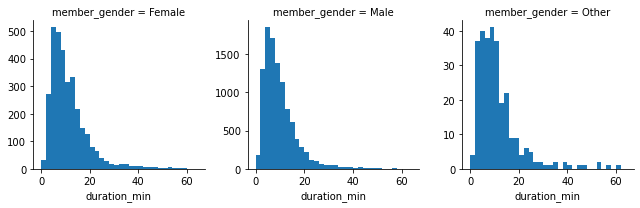

In [54]:
bin_edges = np.arange(0, 65,2)
plt.figure(figsize = [12,10])
g = sb.FacetGrid(data = df, col = 'member_gender', sharey= False );
g.map(plt.hist, 'duration_min', bins = bin_edges );

**Observation**
>Though not a huge difference, male riders tend to have shorter trips as compared to female users.

### What is the relationship between Member's Age and Ride Duration?

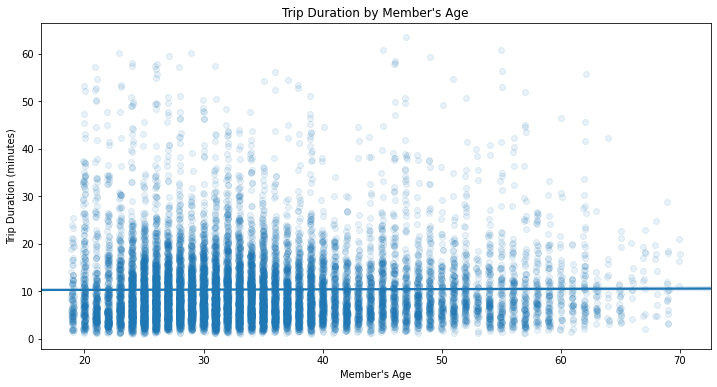

In [55]:
plt.figure(figsize = [12,6])
sb.regplot(data = df, x = 'member_age', y = 'duration_min', truncate=False, x_jitter=0.1, scatter_kws={'alpha':1/10});
plt.ylabel('Trip Duration (minutes)');
plt.xlabel("Member's Age");
plt.title("Trip Duration by Member's Age");

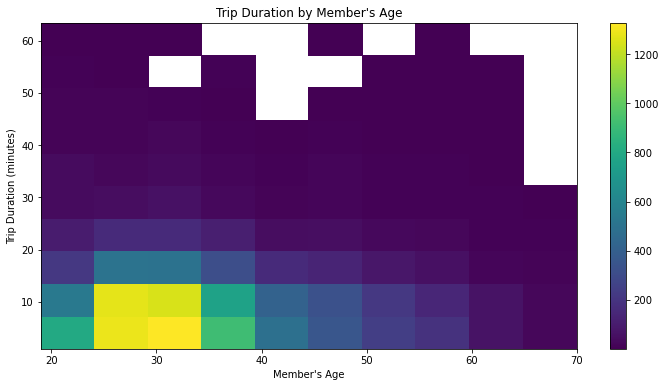

In [56]:
plt.figure(figsize = [12,6])
plt.hist2d(data = df, x = 'member_age', y = 'duration_min', cmin =.5)
plt.colorbar()
plt.ylabel('Trip Duration (minutes)');
plt.xlabel("Member's Age");
plt.title("Trip Duration by Member's Age");

In [57]:
print((len(df[df['member_age'] < 40])/len(df['member_age']) * 100),'%')

76.13424932016602 %


**Observation**
> As observed above, a large percent of riders are less than age 40 and very interestly most of them spend less than 20 minutes on rides

## _Distance Traveled_

### What is the relationship between User Type and Distrance Traveled?

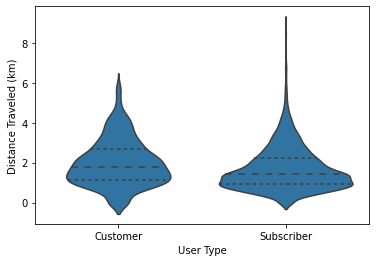

In [58]:
sb.violinplot(data=df, x='user_type', y='dist', color = c, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Distance Traveled (km)');

**Observation**
>It seems subscribers tend to traveled shorter distance as compared to customers.

### What is the relationship between Start Week Day and Distrance Traveled?

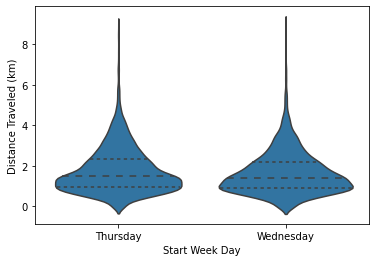

In [59]:
sb.violinplot(data=df, x='start_weekday', y='dist', color = c, inner='quartile');
plt.xlabel('Start Week Day');
plt.ylabel('Distance Traveled (km)');

**Observation**
> Distance tranveled on both of the days seems similar but it seems Thursday travel just slitghtly more than those on Wednesday

### What is the relationship between Member's Gender and Distrance Traveled?

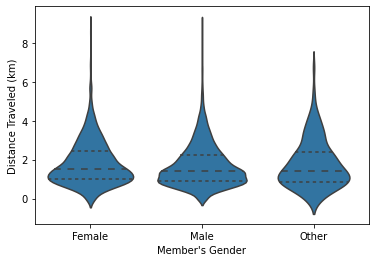

In [60]:
sb.violinplot(data=df, x='member_gender', y='dist', color = c, inner='quartile');
plt.xlabel("Member's Gender");
plt.ylabel('Distance Traveled (km)');

<Figure size 864x720 with 0 Axes>

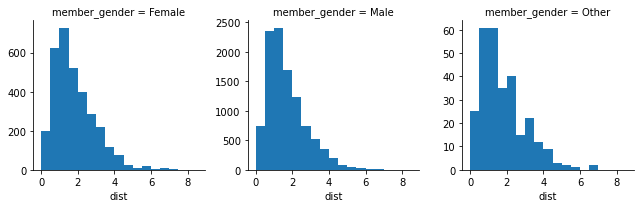

In [61]:
bin_edges = np.arange(0,9,.5)
plt.figure(figsize = [12,10])
g = sb.FacetGrid(data = df, col = 'member_gender', sharey= False );
g.map(plt.hist, 'dist', bins = bin_edges );

**Observation**
>It seems more males travel slightly more distance than females

### What is the relationship between Member's Age and Distrance Traveled?

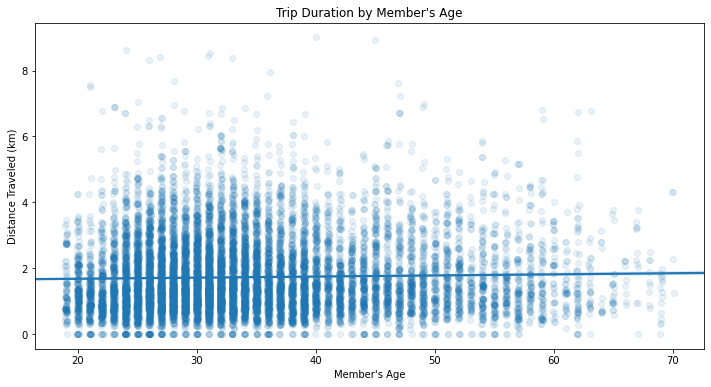

In [62]:
plt.figure(figsize = [12,6])
sb.regplot(data = df, x = 'member_age', y = 'dist', truncate=False, x_jitter=0.1, scatter_kws={'alpha':1/10});
plt.ylabel('Distance Traveled (km)');
plt.xlabel("Member's Age");
plt.title("Trip Duration by Member's Age");

In [63]:
df['dist'].corr(df['member_age'])

0.029748761090118515

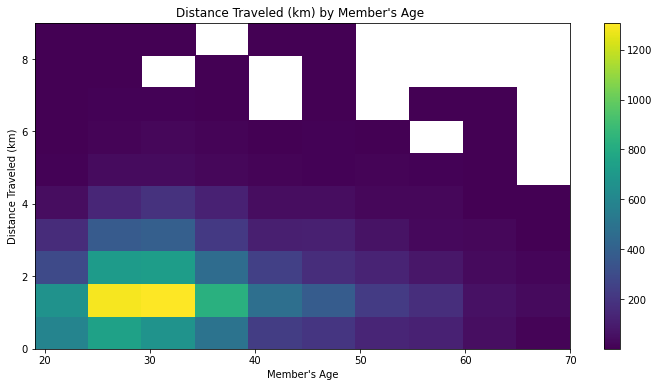

In [64]:
plt.figure(figsize = [12,6])
plt.hist2d(data = df, x = 'member_age', y = 'dist', cmin =.5)
plt.colorbar()
plt.title("Distance Traveled (km) by Member's Age ");
plt.ylabel('Distance Traveled (km)');
plt.xlabel("Member's Age");

**Observation**
>Most riders were of ages less than 40 and traveled distance less than 3km.
 It is also seen that member over 50 didn't travel some distance. This is understandable especially considering their old age

### What is the relationship between Ride Duration and Distrance Traveled?

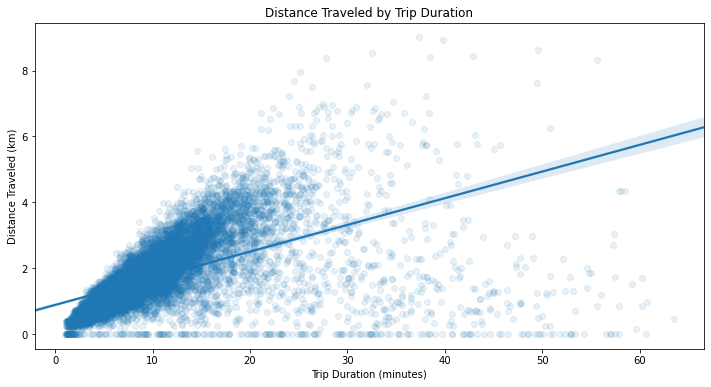

In [65]:
plt.figure(figsize = [12,6])
sb.regplot(data = df, x = 'duration_min', y = 'dist', truncate=False, x_jitter=0.1, scatter_kws={'alpha':1/10});
plt.xlabel('Trip Duration (minutes)');
plt.ylabel('Distance Traveled (km)');
plt.title('Distance Traveled by Trip Duration');

In [66]:
df['dist'].corr(df['duration_min'])

0.5536621978362637

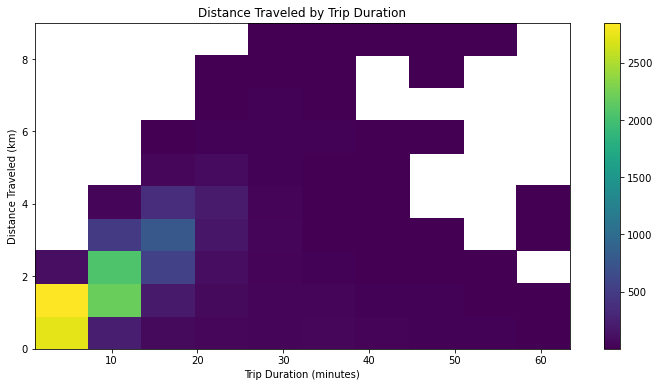

In [67]:
plt.figure(figsize = [12,6])
plt.hist2d(data = df, x = 'duration_min', y = 'dist', cmin =.5)
plt.colorbar()
plt.xlabel('Trip Duration (minutes)');
plt.ylabel('Distance Traveled (km)');
plt.title('Distance Traveled by Trip Duration');

**Observation**
>Distance travel and duration of rides are morderately correlated with the most number of rides taking less than 20mins and traveled less than 4km.
> It was only logical that riders who rode for a short time did not travel far. Surprisingly, those who traveled for the greatest periods of time failed to cover a particular distance.

### General observations from Bivariante Visualisations

> * It was noticed that the very large amount riders were under age 40
> * Interestly, for both user types, rides were highest around 5pm but age-wise, for Subscribers the most rides were done by those of age 31 while for customers those of age 30 had the most rides
> * Interestly, the distribution for Trip duration for males and females were quite similar with only slight differences
> * Also, the distribution for Distance traveled for males and females were quite similar with only slight differences
> * Logically,riders who rode for a short time did not travel far. 

<a id='Multi'></a>
## Multivariate Exploration

> In this section, I would be creating plots of three variables to investigate my data set even
further.

### What is the relationship between Ride Duration and Distrance Traveled for each User Type?

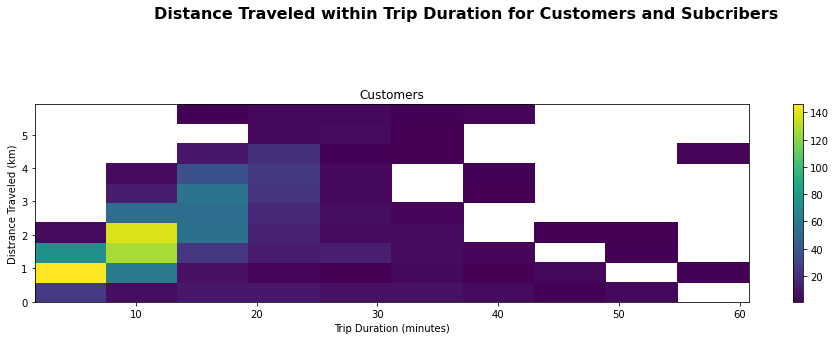

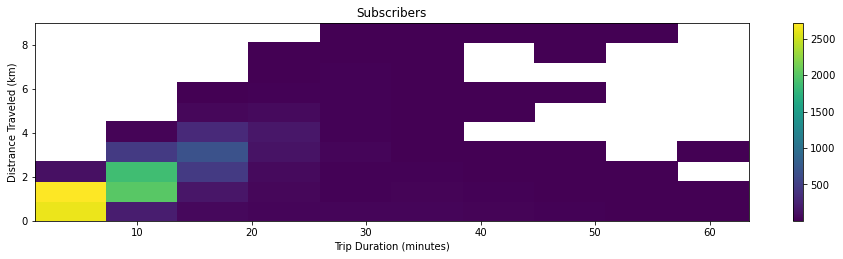

In [68]:
plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
plt.hist2d(data = customers, x = 'duration_min', y = 'dist', cmin =.5)
plt.colorbar()
plt.ylabel("Distrance Traveled (km)");
plt.xlabel('Trip Duration (minutes)');
plt.title('Customers');

plt.suptitle('Distance Traveled within Trip Duration for Customers and Subcribers', y=1.05, fontsize=16, fontweight='bold');

plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1)
Subscriber = df.query('user_type == "Subscriber"')
plt.hist2d(data = Subscriber, x = 'duration_min', y = 'dist', cmin =.5)
plt.colorbar()
plt.ylabel("Distrance Traveled (km)");
plt.xlabel('Trip Duration (minutes)');
plt.title('Subscribers');

_**Observation**_
> Each user type had most members traveling around the same duration and distance

### What is the relationship between Ride Duration and Distrance Traveled for each Gender?

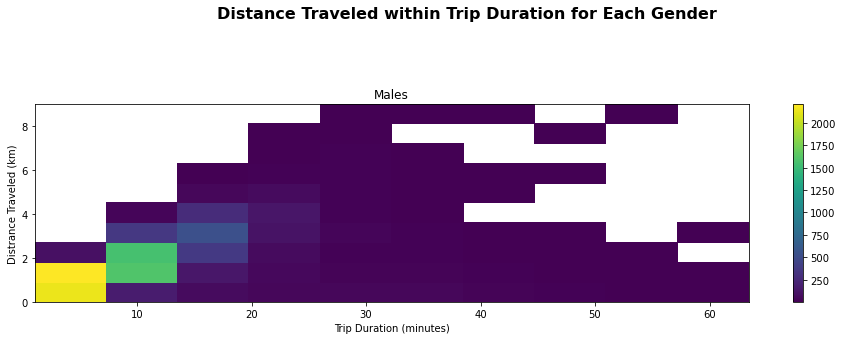

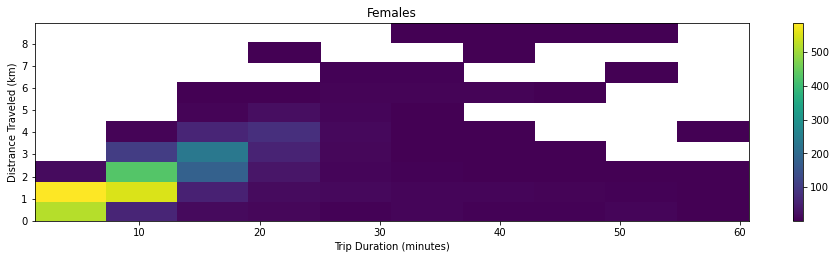

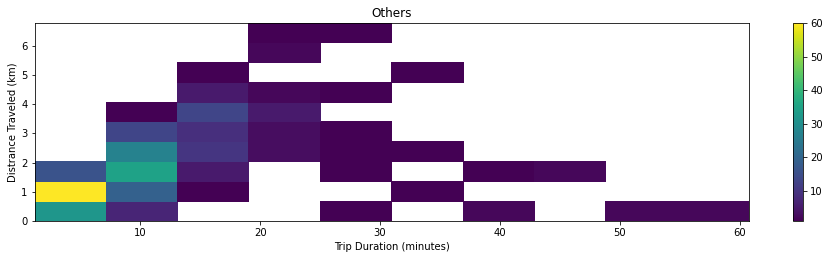

In [69]:
plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1)
Male = df.query('member_gender == "Male"')
plt.hist2d(data = Male, x = 'duration_min', y = 'dist', cmin =.5)
plt.colorbar()
plt.ylabel("Distrance Traveled (km)");
plt.xlabel('Trip Duration (minutes)');
plt.title('Males');

plt.suptitle('Distance Traveled within Trip Duration for Each Gender', y=1.05, fontsize=16, fontweight='bold');

plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1)
Female = df.query('member_gender == "Female"')
plt.hist2d(data = Female, x = 'duration_min', y = 'dist', cmin =.5)
plt.colorbar()
plt.ylabel("Distrance Traveled (km)");
plt.xlabel('Trip Duration (minutes)');
plt.title('Females');


plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1)
Other = df.query('member_gender == "Other"')
plt.hist2d(data = Other, x = 'duration_min', y = 'dist', cmin =.5)
plt.colorbar()
plt.ylabel("Distrance Traveled (km)");
plt.xlabel('Trip Duration (minutes)');
plt.title('Others');

**Observation**_
> Most members of each gender traveled for around the same number of duration and distance.

### What is the relationship between Ride Duration and Distrance Traveled across Member's Ages?

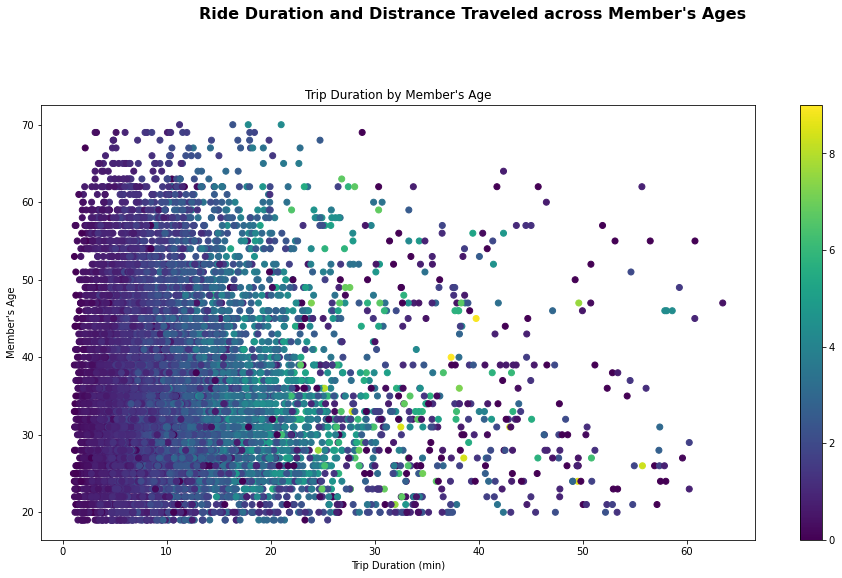

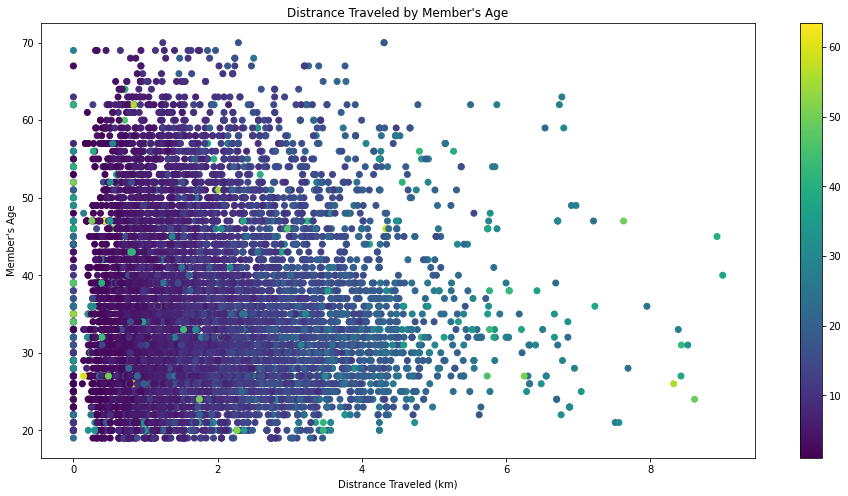

In [70]:
plt.subplot
plt.figure(figsize = (16,8));
plt.scatter(data = df, c = 'dist', y = 'member_age', x = 'duration_min');
plt.colorbar();
plt.xlabel("Trip Duration (min)");
plt.ylabel("Member's Age");
plt.title("Trip Duration by Member's Age");

plt.suptitle("Ride Duration and Distrance Traveled across Member's Ages", y=1.05, fontsize=16, fontweight='bold');

plt.subplot
plt.figure(figsize = (16,8));
plt.scatter(data = df, x = 'dist', y = 'member_age', c = 'duration_min');
plt.colorbar();
plt.xlabel("Distrance Traveled (km)");
plt.ylabel("Member's Age");
plt.title("Distrance Traveled by Member's Age");

_**Observation**_
> It can be observe that rider around the ages of 60 to 70 didn't travel very far distances though a few traveled for long

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Distance Travel and Trip Duration is very similar across gender and user types
> Age-wise it seem over 60 didn't travel pass some minutes or distance

<a id='conclusion'></a>
## Conclusions
* It was observe that a very large amount of the riders were less than 40 years. This makes sense, especially given that persons of these ages are often healthy and physically active.
* It was interesting to see that most riders regardless of their gender or user type, traveled similar distances and rode for about the same amounts of time.
* It is not unsual that most rides less than 2 km and lasted less than 20min since bikes are not often used for long distance travels. Surprisingly, those who traveled for the greatest periods of time failed to cover maximum distance.
* Most riders where males and majority of users were suscribers.
* It also makes sense that most of the rides during the hours of 8am-9am and 5pm-6pm since these are usually rush hours.
* Distance Travel and Trip Duration is very similar across gender and user types
* Age-wise it seem over 60 didn't travel pass some minutes or distance
